In [1]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]

G:\My Drive\VR_Data\TwoTower\behavior.sqlite


In [3]:
morph_naive_mice = ['4139265.3', '4139265.4','4139265.5']
morph_familiar_mice = ['4222153.2','4222153.1','4222154.1']

In [18]:
S_list, U_list = [],[]
for mouse in morph_naive_mice:
    df_mouse = df[df['MouseName'].str.match(mouse)]
    
    for mat_ind,sess_ind in enumerate(np.arange(5,df_mouse.shape[0])):
        print("session ind",sess_ind)
        sess = df_mouse.iloc[sess_ind]
        S_tmp,U_tmp= sm.single_session(sess,plot=False)
        
        if mat_ind == 0:
            S = np.zeros([S_tmp.shape[0],S_tmp.shape[1],df_mouse.shape[0]-5])
            U = np.zeros([U_tmp.shape[0],U_tmp.shape[1],df_mouse.shape[0]-5])
        S[:,:,mat_ind]=S_tmp
        U[:,:,mat_ind]=U_tmp
        
    S_list.append(S)
    U_list.append(U)
    
    

session ind 5
num aberrant ttls 0.0
35085 (35085,) (35085, 21) 115307
frame diff 0
(1771, 90) (90, 1771)
(1771, 180) (90, 1771)
(1771, 270) (90, 1771)
(1771, 360) (90, 1771)
session ind 6
num aberrant ttls 0.0
33140 (33140,) (33140, 21) 109003
frame diff 0
(1751, 90) (90, 1751)
(1751, 180) (90, 1751)
(1751, 270) (90, 1751)
(1751, 360) (90, 1751)
session ind 7
num aberrant ttls 0.0
38209 (38209,) (38209, 21) 126969
frame diff 0
(1736, 90) (90, 1736)
(1736, 180) (90, 1736)
(1736, 270) (90, 1736)
(1736, 360) (90, 1736)
session ind 8
num aberrant ttls 0.0
33547 (33547,) (33547, 21) 110218
frame diff 0
(1628, 90) (90, 1628)
(1628, 180) (90, 1628)
(1628, 270) (90, 1628)
(1628, 360) (90, 1628)
session ind 9
num aberrant ttls 0.0
32038 (32038,) (32038, 21) 105022
frame diff 0
(1634, 90) (90, 1634)
(1634, 180) (90, 1634)
(1634, 270) (90, 1634)
(1634, 360) (90, 1634)
session ind 5
num aberrant ttls 0.0
30897 (30897,) (30897, 21) 102093
frame diff 0
(1543, 90) (90, 1543)
(1543, 180) (90, 1543)
(1

In [30]:
U_list = []
morphs = [0,.25,.5,.75,1]
for mouse in morph_naive_mice:
    df_mouse = df[df['MouseName'].str.match(mouse)]
    
    for mat_ind,sess_ind in enumerate(np.arange(5,df_mouse.shape[0])):
        print("session ind",sess_ind)
        sess = df_mouse.iloc[sess_ind]
        
        VRDat, C, S, A = pp.load_scan_sess(sess,fneu_coeff=0.7)
        trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
        S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values,bin_size=10)
        S_tm = S_trial_mat.reshape([S_trial_mat.shape[0],-1])
        S_tm/=np.linalg.norm(S_tm,ord=2,axis=1)[:,np.newaxis]
        SM=np.matmul(S_tm,S_tm.T)
        
        U_tmp = np.zeros([5,5])
        for row,morph_r in enumerate(morphs):
            for col, morph_c in enumerate(morphs):
                mask = np.matmul((trial_info['morphs']==morph_r).reshape([-1,1]),(trial_info['morphs']==morph_c).reshape([1,-1]))
                U_tmp[row,col] =  SM[mask].ravel().mean()
        
        if mat_ind == 0:
        
            U = np.zeros([U_tmp.shape[0],U_tmp.shape[1],df_mouse.shape[0]-5])
        
        U[:,:,mat_ind]=U_tmp
        
    
    U_list.append(U)
    

session ind 5
num aberrant ttls 0.0
35085 (35085,) (35085, 21) 115307
frame diff 0
session ind 6
num aberrant ttls 0.0
33140 (33140,) (33140, 21) 109003
frame diff 0
session ind 7
num aberrant ttls 0.0
38209 (38209,) (38209, 21) 126969
frame diff 0
session ind 8
num aberrant ttls 0.0
33547 (33547,) (33547, 21) 110218
frame diff 0
session ind 9
num aberrant ttls 0.0
32038 (32038,) (32038, 21) 105022
frame diff 0
session ind 5
num aberrant ttls 0.0
30897 (30897,) (30897, 21) 102093
frame diff 0
session ind 6
num aberrant ttls 0.0
29023 (29023,) (29023, 21) 95160
frame diff 0
session ind 7
num aberrant ttls 0.0
31116 (31116,) (31116, 21) 102131
frame diff 0
session ind 8
num aberrant ttls 0.0
31932 (31932,) (31932, 21) 105228
frame diff 0
session ind 9
num aberrant ttls 0.0
30493 (30493,) (30493, 21) 100982
frame diff 0
session ind 10
num aberrant ttls 0.0
32084 (32084,) (32084, 21) 105601
frame diff 0
session ind 5
num aberrant ttls 0.0
34737 (34737,) (34737, 21) 113863
frame diff 0
sess

[[0.17725239 0.11947768 0.07817718 0.0758684  0.07575878]
 [0.11947768 0.15947234 0.08872515 0.08590117 0.08643145]
 [0.07817718 0.08872515 0.15538209 0.11503325 0.11639736]
 [0.0758684  0.08590117 0.11503325 0.16654672 0.12545855]
 [0.07575878 0.08643145 0.11639736 0.12545855 0.15866719]]


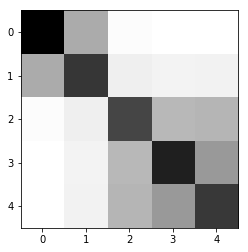

In [29]:
U_tmp = U_list[0]
print(U_tmp.mean(axis=-1))
f,ax = plt.subplots()
ax.imshow(U_tmp.mean(axis=-1),cmap='Greys')

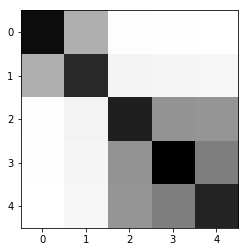

In [31]:
U_mean = np.zeros(U_list[0].shape[:-1])
# S_mean = np.zeros(S_list[0].shape[:-1])
for mouse in range(len(U_list)):
    U_mean+=U_list[mouse].mean(axis=-1)
#     S_mean+=S_list[mouse].mean(axis=-1)
U_mean/=mouse
# S_mean/=mouse

f_U,ax_U = plt.subplots()
ax_U.imshow(U_mean,cmap='Greys')
# f_U.savefig("G:\\My Drive\\LabEvening_2019\\MorphSimMat_mean_MorphNaive.pdf",format='pdf')

# f_S,ax_S = sm.plot_simmat(S_mean,5)
# f_S.savefig("G:\\My Drive\\LabEvening_2019\\PosMorphSimMat_mean_MorphNaive.pdf",format='pdf')

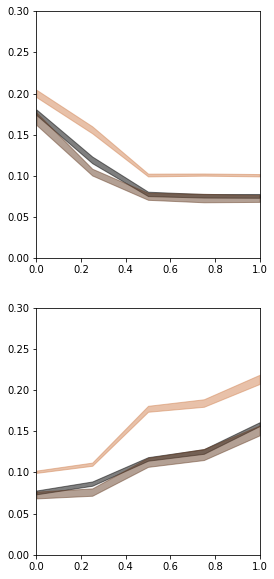

In [34]:
f,ax = plt.subplots(2,1,figsize=[4,10])
morphs = np.array([0,.25,.5,.75,1])
for mouse in range(len(U_list)):
    color = mouse/np.float(len(U_list))
    U_tmp = U_list[mouse]
    U_mean = U_tmp.mean(axis=-1)
    U_sem = sp.stats.sem(U_tmp,axis=-1)
    
#     ax.plot(morphs,U_mean[0,:])

    for ind,m in enumerate([0,-1]): #range(morphs.shape[0]):
#         mask = np.ones(morphs.shape)
#         mask[m]=0
#         mask = mask>0
        ax[ind].fill_between(morphs,U_mean[m,:]+U_sem[m,:],y2=U_mean[m,:]-U_sem[m,:],color=plt.cm.copper(color),alpha=.5)
        ax[ind].set_ylim([0,.3])
        ax[ind].set_xlim([0,1])
#         ax[1].fill_between(morphs,U_mean[-1,:]+U_sem[-1,:],y2=U_mean[-1,:]-U_sem[-1,:],color=plt.cm.copper(color),alpha=.5)
    
#     f.savefig("G:\\My Drive\\LabEvening_2019\\PVCorr_mouseavg_MorphNaive.svg",format='svg')

In [27]:
S_list_fam, U_list_fam = [],[]
for mouse in morph_familiar_mice:
    df_mouse = df[df['MouseName'].str.match(mouse)]
    
    for mat_ind,sess_ind in enumerate(np.arange(5,df_mouse.shape[0])):
        print("session ind",sess_ind)
        sess = df_mouse.iloc[sess_ind]
        S_tmp,U_tmp= sm.single_session(sess,plot=False)
        
        if mat_ind == 0:
            S = np.zeros([S_tmp.shape[0],S_tmp.shape[1],df_mouse.shape[0]-5])
            U = np.zeros([U_tmp.shape[0],U_tmp.shape[1],df_mouse.shape[0]-5])
        S[:,:,mat_ind]=S_tmp
        U[:,:,mat_ind]=U_tmp
        
    S_list_fam.append(S)
    U_list_fam.append(U)
    

session ind 5
num aberrant ttls 0.0
33545 (33545,) (33545, 21) 121243
frame diff 0
(2149, 90) (90, 2149)
(2149, 180) (90, 2149)
(2149, 270) (90, 2149)
(2149, 360) (90, 2149)
session ind 6
num aberrant ttls 0.0
38697 (38697,) (38697, 21) 129389
frame diff 0
(2046, 90) (90, 2046)
(2046, 180) (90, 2046)
(2046, 270) (90, 2046)
(2046, 360) (90, 2046)
session ind 7
num aberrant ttls 0.0
37344 (37344,) (37344, 21) 121463
frame diff 0
(1951, 90) (90, 1951)
(1951, 180) (90, 1951)
(1951, 270) (90, 1951)
(1951, 360) (90, 1951)
session ind 5
num aberrant ttls 0.0
33778 (33778,) (33778, 21) 111444
frame diff 0
(273, 90) (90, 273)
(273, 180) (90, 273)
(273, 270) (90, 273)
(273, 360) (90, 273)
session ind 6
num aberrant ttls 0.0
35977 (35977,) (35977, 21) 118959
frame diff 0
(237, 90) (90, 237)
(237, 180) (90, 237)
(237, 270) (90, 237)
(237, 360) (90, 237)
session ind 5
num aberrant ttls 0.0
28890 (28890,) (28890, 21) 94524
frame diff 0
(571, 90) (90, 571)
(571, 180) (90, 571)
(571, 270) (90, 571)
(5

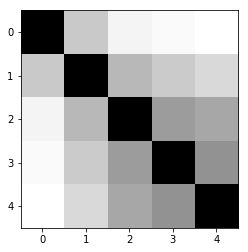

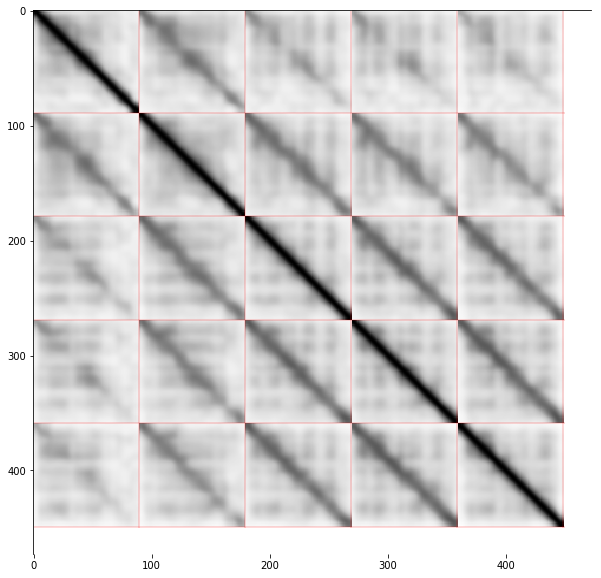

In [28]:
U_mean = np.zeros(U_list[0].shape[:-1])
S_mean = np.zeros(S_list[0].shape[:-1])
for mouse in range(len(U_list_fam)):
    U_mean+=U_list_fam[mouse].mean(axis=-1)
    S_mean+=S_list_fam[mouse].mean(axis=-1)
U_mean/=mouse
S_mean/=mouse

f_U,ax_U = plt.subplots()
ax_U.imshow(U_mean,cmap='Greys')
f_U.savefig("G:\\My Drive\\LabEvening_2019\\MorphSimMat_mean_MorphFamiliar.pdf",format='pdf')

f_S,ax_S = sm.plot_simmat(S_mean,5)
f_S.savefig("G:\\My Drive\\LabEvening_2019\\PosMorphSimMat_mean_MorphFamiliar.pdf",format='pdf')

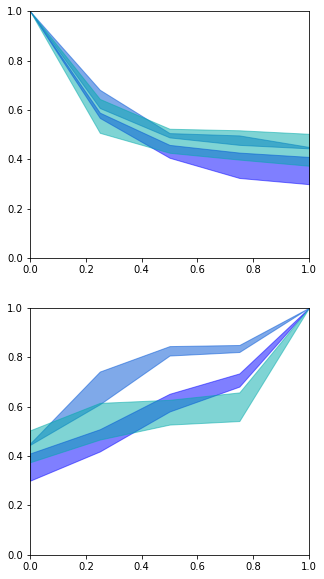

In [75]:
f,ax = plt.subplots(2,1,figsize=[5,10])
morphs = np.array([0,.25,.5,.75,1])
for mouse in range(len(U_list_fam)):
    color = mouse/np.float(len(U_list_fam))
    U_tmp = U_list_fam[mouse]
    U_mean = U_tmp.mean(axis=-1)
    U_sem = sp.stats.sem(U_tmp,axis=-1)
    
#     ax.plot(morphs,U_mean[0,:])
    for ind,m in enumerate([0,-1]):#range(morphs.shape[0]):
        ax[ind].fill_between(morphs,U_mean[m,:]+U_sem[m,:],y2=U_mean[m,:]-U_sem[m,:],color=plt.cm.winter(color),alpha=.5)
        ax[ind].set_ylim([0,1])
        ax[ind].set_xlim([0,1])
        
#     ax[0].fill_between(morphs,U_mean[0,:]+U_sem[0,:],y2=U_mean[0,:]-U_sem[0,:],color=plt.cm.winter(color),alpha=.5)
#     ax[1].fill_between(morphs,U_mean[-1,:]+U_sem[-1,:],y2=U_mean[-1,:]-U_sem[-1,:],color=plt.cm.winter(color),alpha=.5)
    
    f.savefig("G:\\My Drive\\LabEvening_2019\\PVCorr_mouseavg_MorphFamiliar.svg",format='svg')

In [44]:
morphs = np.array([0,.25,.5,.75,1])
morphs[:0]=-1

In [45]:
print(morphs)

[0.   0.25 0.5  0.75 1.  ]
